# Logistic Regression on Titanic Dataset 

## Predicting the survival of passengers in Titanic Crash

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Importing the Data Set into our Python Script

In [6]:
titanic=pd.read_csv("C:/Users/LENOVO/Desktop/PSR/Sweety/tested.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [110]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

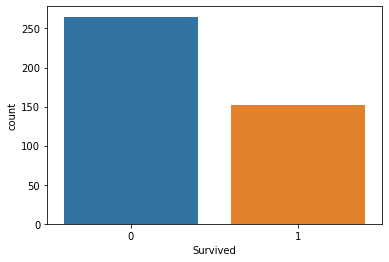

In [109]:
sns.countplot(x='Survived', data=titanic)

## Survival Rates Between Genders

<AxesSubplot:xlabel='Survived', ylabel='count'>

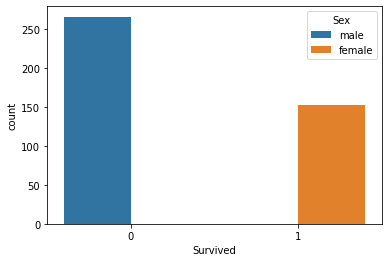

In [9]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

## Survival Rates Between Passenger Classes

<AxesSubplot:xlabel='Survived', ylabel='count'>

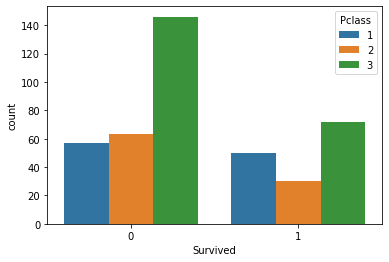

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

## The Age Distribution of Titanic Passengers

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

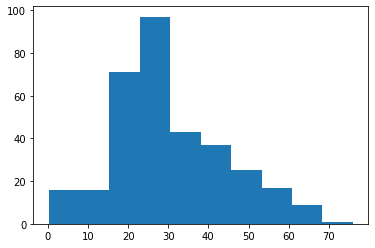

In [14]:
plt.hist(titanic['Age'].dropna())

## The Ticket Price Distribution of Titanic Passengers

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

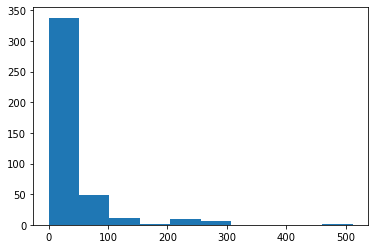

In [18]:
plt.hist(titanic['Fare'])

## Checking NULL values present in the dataset and removing them with imputation method

In [19]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

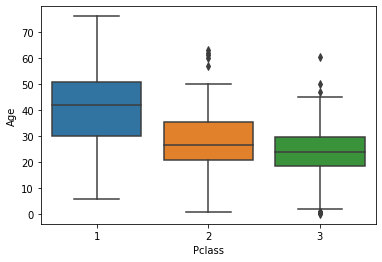

In [23]:
sns.boxplot(titanic['Pclass'], titanic['Age'])

In [25]:
titanic[titanic['Pclass'] == 1]['Age'].mean()

40.91836734693877

In [26]:
titanic[titanic['Pclass']==2]['Age'].mean()

28.7775

In [27]:
titanic[titanic['Pclass']==3]['Age'].mean()

24.02794520547945

In [30]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic[titanic['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic[titanic['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic[titanic['Pclass'] == 3]['Age'].mean()

    else:

        return age

In [31]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

<AxesSubplot:>

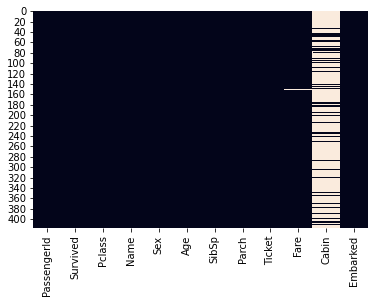

In [33]:
sns.heatmap(titanic.isnull(), cbar=False)

## Removing data with more NULL values

In [34]:
titanic.drop('Cabin', axis=1, inplace = True)

In [35]:
titanic.dropna(inplace = True)

## Handling categorical data with dummies

In [36]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [37]:
pd.get_dummies(titanic['Sex'], drop_first = True)

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [38]:
sex_data = pd.get_dummies(titanic['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic['Embarked'], drop_first = True)

In [42]:
print(sex_data)
print(embarked_data)

     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[417 rows x 1 columns]
     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[417 rows x 2 columns]


In [44]:
titanic = pd.concat([titanic, sex_data, embarked_data], axis = 1)

In [45]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [47]:
titanic.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [48]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [50]:
y_data=titanic['Survived']
X_data=titanic.drop('Survived',axis=1)

## Splitting data into train and test sets

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state=0)

## Importing Logistic Regression algorithm from sklearn

In [104]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
regression.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
predictions = regression.predict(X_test)

## Regression Metrics for checking the accuracy of the model

In [106]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        43\n           1       1.00      1.00      1.00        41\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [107]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[43  0]
 [ 0 41]]


In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

1.0
